In [13]:
import scanpy as sc
import os, sys
# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.insert(0, os.path.dirname(current_dir))
from Methods.SpaMV.utils import clustering
data_spamv = sc.read_h5ad('../Results/6_Mouse_Embryo/adata_SpaMV.h5ad')
data_spamv.obsm['Shared'] = data_spamv.obsm['SpaMV'][:, :32]
data_spamv.obsm['Transcriptomics'] = data_spamv.obsm['SpaMV'][:, 32:64]
data_spamv.obsm['Epigenomics'] = data_spamv.obsm['SpaMV'][:, 64:]
clustering(data_spamv, n_clusters=14, key='SpaMV', add_key='SpaMV', use_pca=True)
clustering(data_spamv, n_clusters=5, key='Shared', add_key='Shared', use_pca=False)
clustering(data_spamv, n_clusters=5, key='Transcriptomics', add_key='Transcriptomics', use_pca=False)
clustering(data_spamv, n_clusters=5, key='Epigenomics', add_key='Epigenomics', use_pca=False)

sc.pl.embedding(data_spamv, basis='spatial', color=['SpaMV', 'Shared', 'Transcriptomics', 'Epigenomics'], size=200)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../Results/6_Mouse_Embryo/adata_SpaMV.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


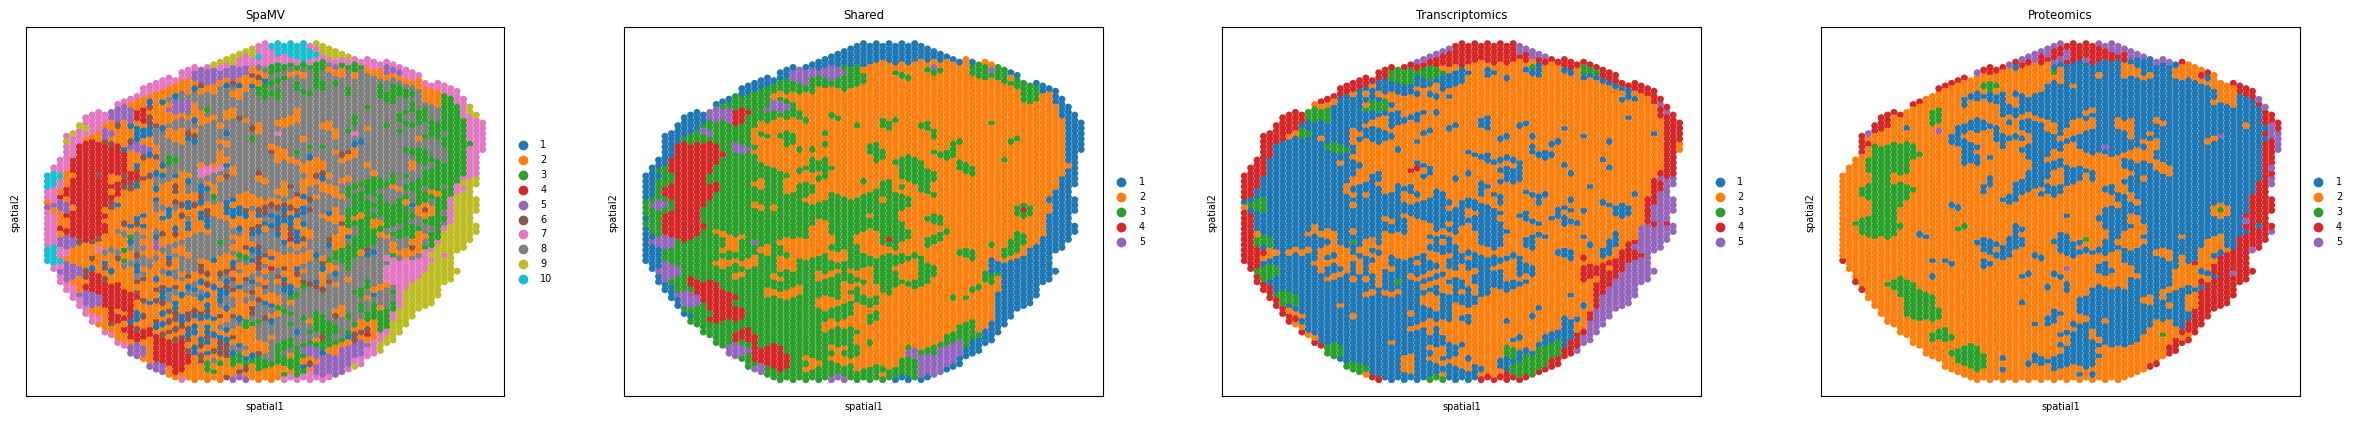

In [71]:
import scanpy as sc
import os, sys
# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.insert(0, os.path.dirname(current_dir))
from Methods.SpaMV.utils import clustering
data_spamv_4 = sc.read_h5ad('../Results/4_Human_Lymph_Node/adata_SpaMV.h5ad')
data_spamv_4.obsm['Shared'] = data_spamv_4.obsm['SpaMV'][:, :32]
data_spamv_4.obsm['Transcriptomics'] = data_spamv_4.obsm['SpaMV'][:, 32:64]
data_spamv_4.obsm['Proteomics'] = data_spamv_4.obsm['SpaMV'][:, 64:]
clustering(data_spamv_4, n_clusters=5, key='Shared', add_key='Shared', use_pca=False)
clustering(data_spamv_4, n_clusters=5, key='Transcriptomics', add_key='Transcriptomics', use_pca=False)
clustering(data_spamv_4, n_clusters=5, key='Proteomics', add_key='Proteomics', use_pca=False)

sc.pl.embedding(data_spamv_4, basis='spatial', color=['SpaMV', 'Shared', 'Transcriptomics', 'Proteomics'], size=100)

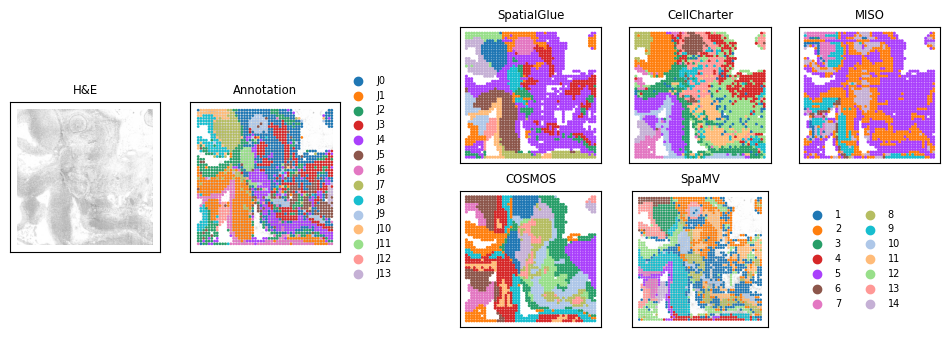

In [27]:
import json
import anndata
import matplotlib
import warnings
import numpy as np
import os, sys
from PIL import Image
# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.insert(0, os.path.dirname(current_dir))
from Methods.SpaMV.metrics import compute_jaccard
from Methods.SpaMV.utils import ST_preprocess, clr_normalize_each_cell, pca
warnings.filterwarnings("ignore")
import scanpy as sc
from scanpy.plotting import embedding
from sklearn.metrics import adjusted_rand_score
import scvi
import squidpy as sq
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import textwrap

font = {'size': 7}

matplotlib.rc('font', **font)


def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

n_topics = 10
cluster_size = 20
cluster_size_4 = 10
dr_4_size = 25
width = 12
height = 16

gt_6_scale = {'top':1-1/height, 'bottom':1-4/height, 'right':.4}
clustering_scale = {'top':1-1/height, 'bottom':1-4/height, 'left':.5}
# load mouse embryo dataset
fig = plt.figure(figsize=(width, height))
spec_gt = GridSpec(1, 2)
spec_gt.update(**gt_6_scale)
he = plt.subplot(spec_gt[0, 0])
gt = plt.subplot(spec_gt[0, 1])

spec_clustering = GridSpec(2, 3)
spec_clustering.update(**clustering_scale)
data_rna_6 = sc.read_h5ad('../Dataset/6_Mouse_Embryo/adata_RNA.h5ad')
data_peaks = sc.read_h5ad('../Dataset/6_Mouse_Embryo/adata_peaks.h5ad')
data_methods = {}
methods = ['SpatialGlue', 'CellCharter', 'MISO', 'COSMOS', 'SpaMV']
for method in methods:
    data_methods[method] = sc.read_h5ad('../Results/6_Mouse_Embryo/' + method + '.h5ad')

spatialglue = plt.subplot(spec_clustering[0, 0])
cellcharter = plt.subplot(spec_clustering[0, 1])
miso = plt.subplot(spec_clustering[0, 2])
cosmos = plt.subplot(spec_clustering[1, 0])
spamv = plt.subplot(spec_clustering[1, 1])
legend = plt.subplot(spec_clustering[1, 2])


sc.pl.spatial(data_rna_6, ax=he, title='H&E', show=False)
sc.pl.spatial(data_rna_6, ax=gt, color='cluster', title='Annotation', show=False)
embedding(data_methods['SpatialGlue'], color='SpatialGlue', ax=spatialglue, basis='spatial', show=False, size=cluster_size, legend_loc='none')
embedding(data_methods['CellCharter'], color='CellCharter', ax=cellcharter, basis='spatial', show=False, size=cluster_size, legend_loc='none')
embedding(data_methods['MISO'], color='MISO', ax=miso, basis='spatial', show=False, size=cluster_size, legend_loc='none')
embedding(data_methods['COSMOS'], color='COSMOS', ax=cosmos, basis='spatial', show=False, size=cluster_size, legend_loc='none')
sc.pl.spatial(data_methods['SpaMV'], ax=spamv, color='SpaMV', show=False)
# embedding(data_spamv, color='Shared', basis='spatial', ax=spamv_shared, title='SpaMV\nShared', show=False, size=cluster_size, legend_loc='none')
# embedding(data_spamv, color='Transcriptomics', basis='spatial', ax=spamv_transcriptomics, title='SpaMV\nTranscriptomics', show=False, size=cluster_size, legend_loc='none')
# embedding(data_spamv, color='Epigenomics', basis='spatial', ax=spamv_epigenomics, title='SpaMV\nEpigenomics', show=False, size=cluster_size, legend_loc='none')
handles, labels = spamv.get_legend_handles_labels()
legend.legend(handles, labels, loc='center left', frameon=False, ncols=2)
legend.axis('off')
spamv.get_legend().remove()
for f in [he, gt, spatialglue, cellcharter, cosmos, miso, spamv]:
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)

plt.savefig('../Figures/visualisation_3_6_Mouse_Thymus.pdf')
plt.show()

ValueError: Value passed for key 'SpaMV' is of incorrect shape. Values of obsm must match dimensions ('obs',) of parent. Value had shape (3461,) while it should have had (3484,).

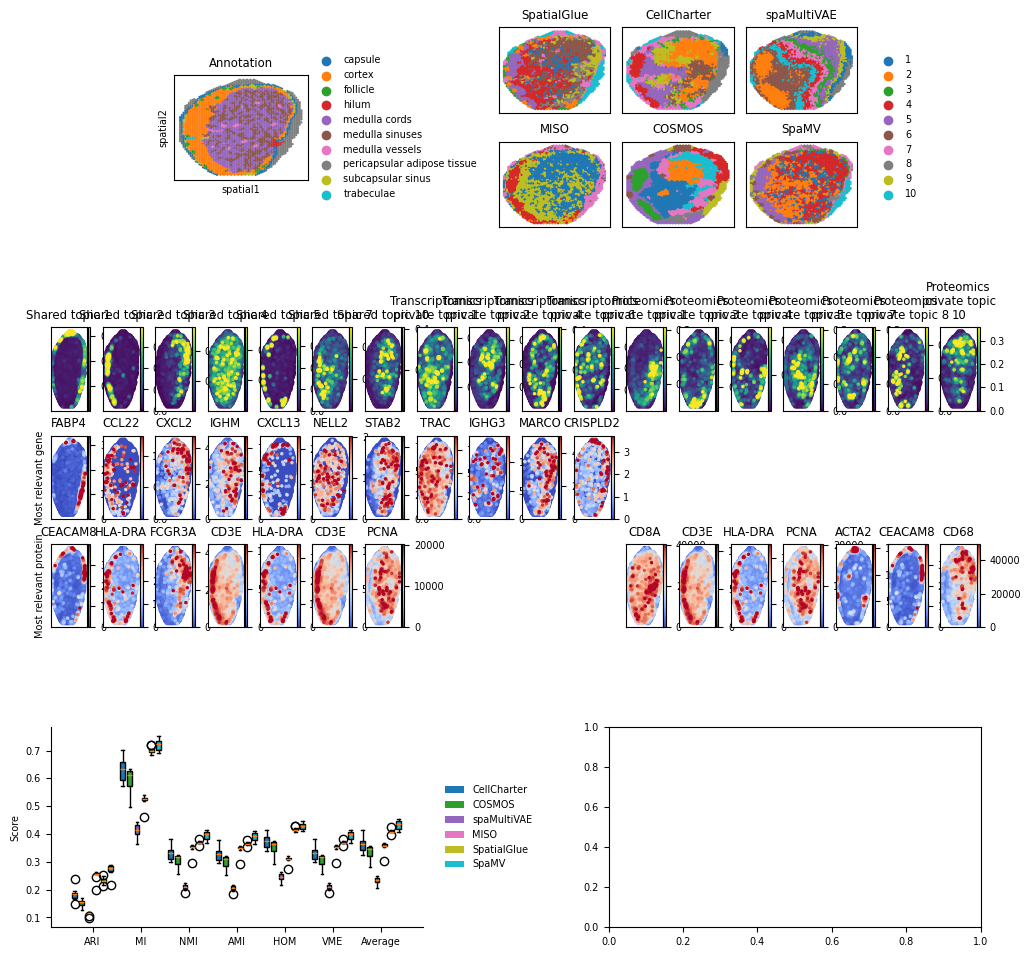

In [ ]:
import anndata
import matplotlib
import warnings
import numpy as np
import os, sys
# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.insert(0, os.path.dirname(current_dir))
from Methods.SpaMV.metrics import compute_jaccard
from Methods.SpaMV.utils import ST_preprocess, clr_normalize_each_cell, pca
warnings.filterwarnings("ignore")
import scanpy as sc
from scanpy.plotting import embedding
from sklearn.metrics import adjusted_rand_score
import scvi
import squidpy as sq
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import textwrap

font = {'size': 7}

matplotlib.rc('font', **font)


def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

n_topics = 10
cluster_size = 20
cluster_size_4 = 10
dr_4_size = 25
width = 12
height = 11

clustering_4_scale = {'top': 1-1/height, 'bottom': 1-3/height}
dr_4_scale = {'top' : 1-4/height, 'bottom': 1-7/height}
score_scale = {'top': 1-8/height, 'bottom': 1-10/height}
# load mouse embryo dataset
fig = plt.figure(figsize=(width, height))
###########################################################################################################################################################################
# plot human lymph node clustering results
spec_clustering_4 = GridSpec(4, 7, width_ratios=[1, 1.2, 1.5, 1, 1, 1, 1], height_ratios=[.5, 1, 1, .5], wspace=0.1, hspace=1)
spec_clustering_4.update(**clustering_4_scale)
data_rna_4 = sc.read_h5ad('../Dataset/4_Human_Lymph_Node/adata_RNA.h5ad')
sc.pp.normalize_total(data_rna_4)
data_pro_4 = sc.read_h5ad('../Dataset/4_Human_Lymph_Node/adata_ADT.h5ad')
sc.pp.normalize_total(data_pro_4)

data_spatialglue_4 = sc.read_h5ad('../Results/4_Human_Lymph_Node/SpatialGlue.h5ad')
data_spamultivae_cellcharter = sc.read_h5ad('../Results/4_Human_Lymph_Node/spaMultiVAE_CellCharter.h5ad')
data_spamultivae_cellcharter.obs['spaMultiVAE'] = data_spamultivae_cellcharter.obs['spaMultiVAE'].astype('category')
data_miso_4 = sc.read_h5ad('../Results/4_Human_Lymph_Node/MISO.h5ad')
data_miso_4.obs['MISO'] = data_miso_4.obs['miso'].astype('category')
data_cosmos_4 = sc.read_h5ad('../Results/4_Human_Lymph_Node/COSMOS.h5ad')
data_cosmos_4.obs['COSMOS'] = data_cosmos_4.obs['cosmos'].astype('category')
data_spamv_4 = sc.read_h5ad('../Results/4_Human_Lymph_Node/SpaMV.h5ad')

gt_4 = plt.subplot(spec_clustering_4[1:3, 1])
spatialglue_4 = plt.subplot(spec_clustering_4[:2, 3])
cellcharter_4 = plt.subplot(spec_clustering_4[:2, 4])
spamultivae = plt.subplot(spec_clustering_4[:2, 5])
miso_4 = plt.subplot(spec_clustering_4[2:, 3])
cosmos_4 = plt.subplot(spec_clustering_4[2:, 4])
spamv_4 = plt.subplot(spec_clustering_4[2:, 5])
# spamv_shared_4 = plt.subplot(spec_clustering_4[1, 2])
# spamv_transcriptomics_4 = plt.subplot(spec_clustering_4[1, 3])
# spamv_proteomics = plt.subplot(spec_clustering_4[1, 4])
legend_4 = plt.subplot(spec_clustering_4[:, 6])

embedding(data_rna_4, color='cluster', ax=gt_4, basis='spatial', title='Annotation', show=False, size=cluster_size_4)
embedding(data_spatialglue_4, color='SpatialGlue', ax=spatialglue_4, basis='spatial', show=False, size=cluster_size_4, legend_loc='none')
embedding(data_spamultivae_cellcharter, color='CellCharter', ax=cellcharter_4, basis='spatial', show=False, size=cluster_size_4, legend_loc='none')
embedding(data_spamultivae_cellcharter, color='spaMultiVAE', ax=spamultivae, basis='spatial', show=False, size=cluster_size_4, legend_loc='none')
embedding(data_miso_4, color='MISO', ax=miso_4, basis='spatial', show=False, size=cluster_size_4, legend_loc='none')
embedding(data_cosmos_4, color='COSMOS', ax=cosmos_4, basis='spatial', show=False, size=cluster_size_4, legend_loc='none')
embedding(data_spamv_4, color='SpaMV', basis='spatial', ax=spamv_4, show=False, size=cluster_size_4)
# embedding(data_spamv_4, color='Shared', basis='spatial', ax=spamv_shared_4, title='SpaMV\nShared', show=False, size=cluster_size_4, legend_loc='none')
# embedding(data_spamv_4, color='Transcriptomics', basis='spatial', ax=spamv_transcriptomics_4, title='SpaMV\nTranscriptomics', show=False, size=cluster_size_4, legend_loc='none')
# embedding(data_spamv_4, color='Proteomics', basis='spatial', ax=spamv_proteomics, title='SpaMV\nProteomics', show=False, size=cluster_size_4, legend_loc='none')
handles, labels = spamv_4.get_legend_handles_labels()
legend_4.legend(handles, labels, loc='center left', frameon=False)
legend_4.axis('off')
spamv_4.get_legend().remove()

for f in [spatialglue_4, cellcharter_4, spamultivae, miso_4, cosmos_4, spamv_4]:
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
###########################################################################################################################################################################
# plot human lymph node diemnsionality reduction results
z_4 = pd.read_csv('../Results/4_Human_Lymph_Node/SpaMV_z_merged.csv', index_col=0)
data_spamv_4 = data_spamv_4[z_4.index, :]
w_4 = [pd.read_csv('../Results/4_Human_Lymph_Node/SpaMV_w_Transcriptomics_merged.csv', index_col=0), pd.read_csv('../Results/4_Human_Lymph_Node/SpaMV_w_Proteomics_merged.csv', index_col=0)]
data_spamv_4.obs[z_4.columns] = z_4.values
spec_dr_4 = GridSpec(3, z_4.shape[1], width_ratios=[1] * z_4.shape[1], height_ratios=[1] * 3, hspace=.3, wspace=.3)
spec_dr_4.update(**dr_4_scale)

f_dict = {}
i = 0
for topic in z_4.columns:
    if i == 0:
        f_preserved = [topic + '_1', topic + '_2']
    f_dict[topic] = plt.subplot(spec_dr_4[0, i])
    embedding(data_spamv_4, color=z_4.columns[i], basis='spatial', size=dr_4_size, ax=f_dict[topic], show=False, legend_loc='none', vmax='p99', title=textwrap.fill(topic, width=15, break_long_words=False))
    if topic.split(' ')[0] in ['Shared', 'Transcriptomics']:
        f_dict[topic + '_1'] = plt.subplot(spec_dr_4[1, i])
        embedding(data_rna_4, color=str(w_4[0].nlargest(1, topic).index[0]), basis='spatial', size=dr_4_size, cmap='coolwarm', ax=f_dict[topic + '_1'], show=False, vmax='p99')
    if topic.split(' ')[0] in ['Shared', 'Proteomics']:
        f_dict[topic + '_2'] = plt.subplot(spec_dr_4[2, i])
        embedding(data_pro_4, color=str(w_4[1].nlargest(1, topic).index[0]), basis='spatial', size=dr_4_size, cmap='coolwarm', ax=f_dict[topic + '_2'], show=False, vmax='p99')
    i += 1
for key, f in f_dict.items():
    f.axes.get_xaxis().set_visible(False)
    if key in f_preserved and '_1' in key:
        f.set_ylabel('Most relevant gene')
    elif key in f_preserved and '_2' in key:
        f.set_ylabel("Most relevant protein")
    else:
        f.axes.get_yaxis().set_visible(False)

###########################################################################################################################################################################
# plot human lymph node metrics scores
spec_score_4 = GridSpec(1, 2, width_ratios=[1, 1], wspace=.5)
spec_score_4.update(**score_scale)

# clustering supervised scores
clustering_4_supervised = plt.subplot(spec_score_4[0, 0])
evaluation_CellCharter = pd.read_csv('../Results/Evaluation_CellCharter.csv')
evaluation_spaMultiVAE = pd.read_csv('../Results/Evaluation_spaMultiVAE.csv')
evaluation_SpaMV = pd.read_csv('../Results/Evaluation_SpaMV.csv')
evaluation_SpatialGlue = pd.read_csv('../Results/Evaluation_SpatialGlue.csv')
evaluation_MISO = pd.read_csv('../Results/Evaluation_MISO.csv')
evaluation_COSMOS = pd.read_csv('../Results/Evaluation_COSMOS.csv')

combined_df = pd.concat([evaluation_CellCharter, evaluation_COSMOS, evaluation_spaMultiVAE, evaluation_MISO, evaluation_SpatialGlue, evaluation_SpaMV], ignore_index=True)
# combined_df = combined_df.loc[combined_df['epoch'] != 199, :]

# Melt the DataFrame for plotting
melted_df = combined_df.melt(id_vars=["method", "Dataset"], value_vars=["ARI", "MI", "NMI", "AMI", "HOM", "VME", "Average"], var_name="metric", value_name="score")

metrics = melted_df["metric"].unique()
methods = melted_df["method"].unique()
n_metrics = len(metrics)
n_methods = len(methods)

# Calculate positions for each boxplot group
positions = []
data = []
for metric_idx, metric in enumerate(metrics):
    for method_idx, method in enumerate(methods):
        # Filter data for this metric and method
        subset = melted_df[(melted_df["metric"] == metric) & (melted_df["method"] == method) & (melted_df["Dataset"] == '4_Human_Lymph_Node')]
        data.append(subset["score"].values)
        # Position calculation (adjust offset for spacing)
        offset = (method_idx - n_methods/2) * 0.15 + 0.075
        positions.append(metric_idx + offset)

# Plot
boxplots = clustering_4_supervised.boxplot(data, positions=positions, widths=0.1, patch_artist=True)

# Assign colors to methods
colors = plt.cm.tab10(np.linspace(0, 1, n_methods))
for i, box in enumerate(boxplots["boxes"]):
    box.set_facecolor(colors[i % n_methods])  # Cycle colors for each method

# Configure axes and labels
clustering_4_supervised.set_xticks(np.arange(n_metrics))
clustering_4_supervised.set_xticklabels(metrics)
clustering_4_supervised.set_ylabel("Score")

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=method) for i, method in enumerate(methods)]
clustering_4_supervised.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, frameon=False)

# Remove the top and right spines
clustering_4_supervised.spines['top'].set_visible(False)
clustering_4_supervised.spines['right'].set_visible(False)

# clustering unsupervised scores
clustering_4_unsupervised = plt.subplot(spec_score_4[0, 1])

# Prepare data for plotting
combined_df = pd.concat([evaluation_CellCharter, evaluation_COSMOS, evaluation_spaMultiVAE, evaluation_MISO, evaluation_SpatialGlue], ignore_index=True)
melted_df = combined_df.melt(id_vars=["method", "Dataset"], value_vars=['jaccard 1', 'jaccard 2'], var_name="metric", value_name="score")
melted_df['metric'] = melted_df['metric'].replace('jaccard 1', 'Transcriptomics')
melted_df['metric'] = melted_df['metric'].replace('jaccard 2', 'Proteomics')
data_rna_4 = sc.read_h5ad('../Dataset/4_Human_Lymph_Node/adata_RNA.h5ad')
data_rna_4 = ST_preprocess(data_rna_4)
sc.pp.pca(data_rna_4, n_comps=30)
data_rna_4 = anndata.AnnData(data_rna_4.obsm['X_pca'], obs=data_rna_4.obs, obsm=data_rna_4.obsm)
data_rna_4.obsm['X_pca'] = data_rna_4.X

data_pro_4 = sc.read_h5ad('../Dataset/4_Human_Lymph_Node/adata_ADT.h5ad')
data_pro_4 = data_pro_4[data_rna_4.obs_names, :]
data_pro_4 = clr_normalize_each_cell(data_pro_4)
sc.pp.scale(data_pro_4)
data_pro_4 = anndata.AnnData(pca(data_pro_4, n_comps=30), obs=data_pro_4.obs, obsm=data_pro_4.obsm)
data_pro_4.obsm['X_pca'] = data_pro_4.X
for i in range(10):
    data = sc.read_h5ad('../Results/4_Human_Lymph_Node/SpaMV_' + str(i) + '.h5ad')
    for metric in melted_df['metric'].unique():
        data_emb = data_rna_4.copy() if metric == 'Transcriptomics' else data_pro_4.copy()
        for emb_type in ['SpaMV', 'SpaMV Shared embeddings', 'SpaMV Shared & Transcriptomics private embeddings', 'SpaMV Shared & Proteomics private embeddings']:
            if emb_type == 'SpaMV':
                data_emb.obsm[emb_type] = data.obsm['SpaMV']
            elif emb_type == 'SpaMV Shared embeddings':
                data_emb.obsm[emb_type] = data.obsm['SpaMV'][:, :32]
            elif emb_type == 'SpaMV Shared & Transcriptomics private embeddings':
                data_emb.obsm[emb_type] = data.obsm['SpaMV'][:, :64]
            else:
                data_emb.obsm[emb_type] = np.concat((data.obsm['SpaMV'][:, :32], data.obsm['SpaMV'][:, 64:]), axis=1)
                
            melted_df.loc[len(melted_df)] = [emb_type, '4_Human_Lymph_Node', metric, compute_jaccard(data_emb, key=emb_type, use_rep='X_pca')]
metrics = melted_df["metric"].unique()
methods = melted_df["method"].unique()
n_metrics = len(metrics)
n_methods = len(methods)

# Calculate positions for each boxplot group
positions = []
data = []
for metric_idx, metric in enumerate(metrics):
    for method_idx, method in enumerate(methods):
        # Filter data for this metric and method
        subset = melted_df[(melted_df["metric"] == metric) & (melted_df["method"] == method) & (melted_df["Dataset"] == '4_Human_Lymph_Node')]
        data.append(subset["score"].values)
        # Position calculation (adjust offset for spacing)
        offset = (method_idx - n_methods/2) * 0.05 + 0.075
        positions.append(metric_idx + offset)

# Plot
boxplots = clustering_4_unsupervised.boxplot(data, positions=positions, widths=0.1, patch_artist=True)

# Assign colors to methods
colors = plt.cm.tab10(np.linspace(0, 1, n_methods))
for i, box in enumerate(boxplots["boxes"]):
    box.set_facecolor(colors[i % n_methods])  # Cycle colors for each method

# Configure axes and labels
clustering_4_unsupervised.set_xticks(np.arange(n_metrics))
clustering_4_unsupervised.set_xticklabels(metrics)
clustering_4_unsupervised.set_ylabel("Jaccard Similarity")

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=method) for i, method in enumerate(methods)]
clustering_4_unsupervised.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, frameon=False)

# Remove the top and right spines
clustering_4_unsupervised.spines['top'].set_visible(False)
clustering_4_unsupervised.spines['right'].set_visible(False)

plt.savefig('../Figures/visualisation_3_4_Human_Lymph_Node.pdf')
plt.show()

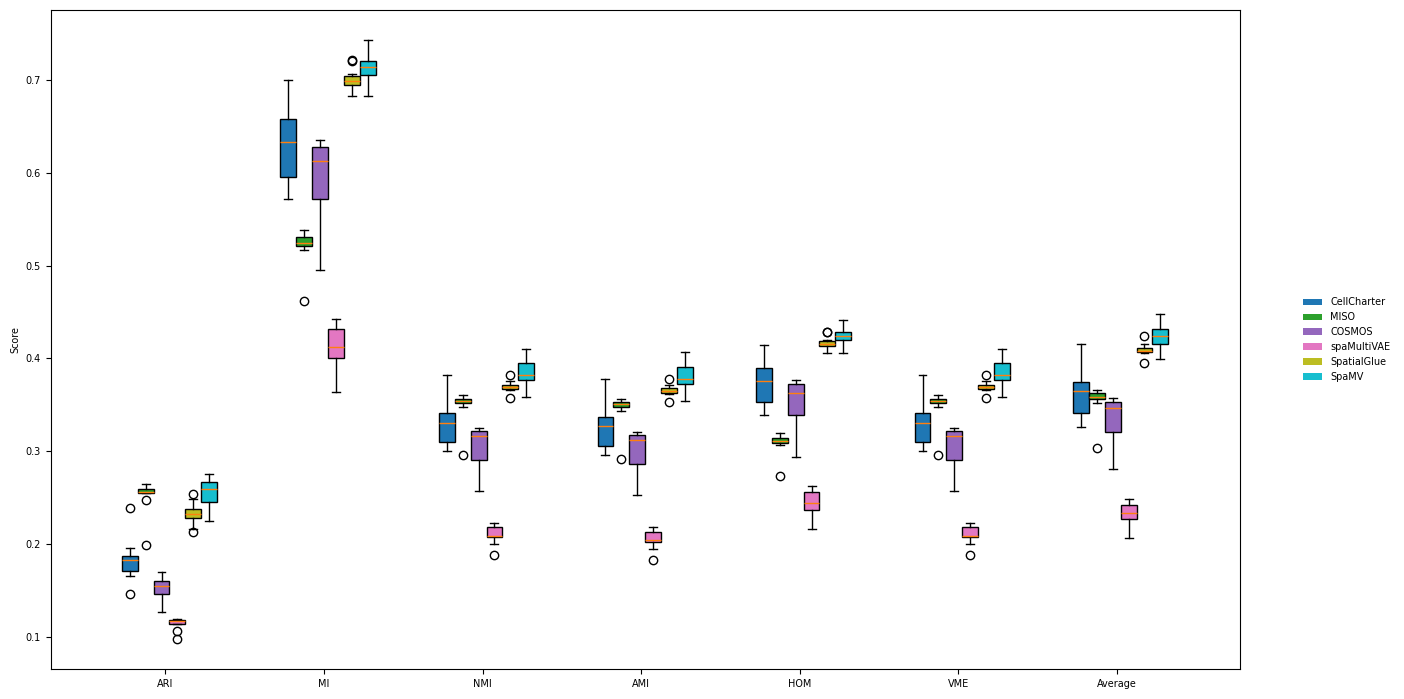

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load all CSV files into a single DataFrame
csv_files = ['../Results/Evaluation_CellCharter.csv', '../Results/Evaluation_MISO.csv', '../Results/Evaluation_COSMOS.csv', '../Results/Evaluation_spaMultiVAE.csv', '../Results/Evaluation_SpatialGlue.csv', '../Results/Evaluation_SpaMV_4_Human_Lymph_Node.csv']
combined_df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
# combined_df = combined_df.loc[combined_df['epoch'] != 199, :]

# Melt the DataFrame for plotting
melted_df = combined_df.melt(
    id_vars=["method", "Dataset"],
    value_vars=["ARI", "MI", "NMI", "AMI", "HOM", "VME", "Average"],
    var_name="metric",
    value_name="score"
)

metrics = melted_df["metric"].unique()
methods = melted_df["method"].unique()
n_metrics = len(metrics)
n_methods = len(methods)

# Calculate positions for each boxplot group
positions = []
data = []
for metric_idx, metric in enumerate(metrics):
    for method_idx, method in enumerate(methods):
        if method == 'SpaMV':
            a = 1
        # Filter data for this metric and method
        subset = melted_df[(melted_df["metric"] == metric) & (melted_df["method"] == method) & (melted_df["Dataset"] == '4_Human_Lymph_Node')]
        data.append(subset["score"].values)
        # Position calculation (adjust offset for spacing)
        offset = (method_idx - n_methods/2) * 0.1 + 0.075
        positions.append(metric_idx + offset)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
boxplots = ax.boxplot(data, positions=positions, widths=0.1, patch_artist=True)

# Assign colors to methods
colors = plt.cm.tab10(np.linspace(0, 1, n_methods))
for i, box in enumerate(boxplots["boxes"]):
    box.set_facecolor(colors[i % n_methods])  # Cycle colors for each method

# Configure axes and labels
ax.set_xticks(np.arange(n_metrics))
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=method) for i, method in enumerate(methods)]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, frameon=False)

plt.tight_layout()
plt.show()


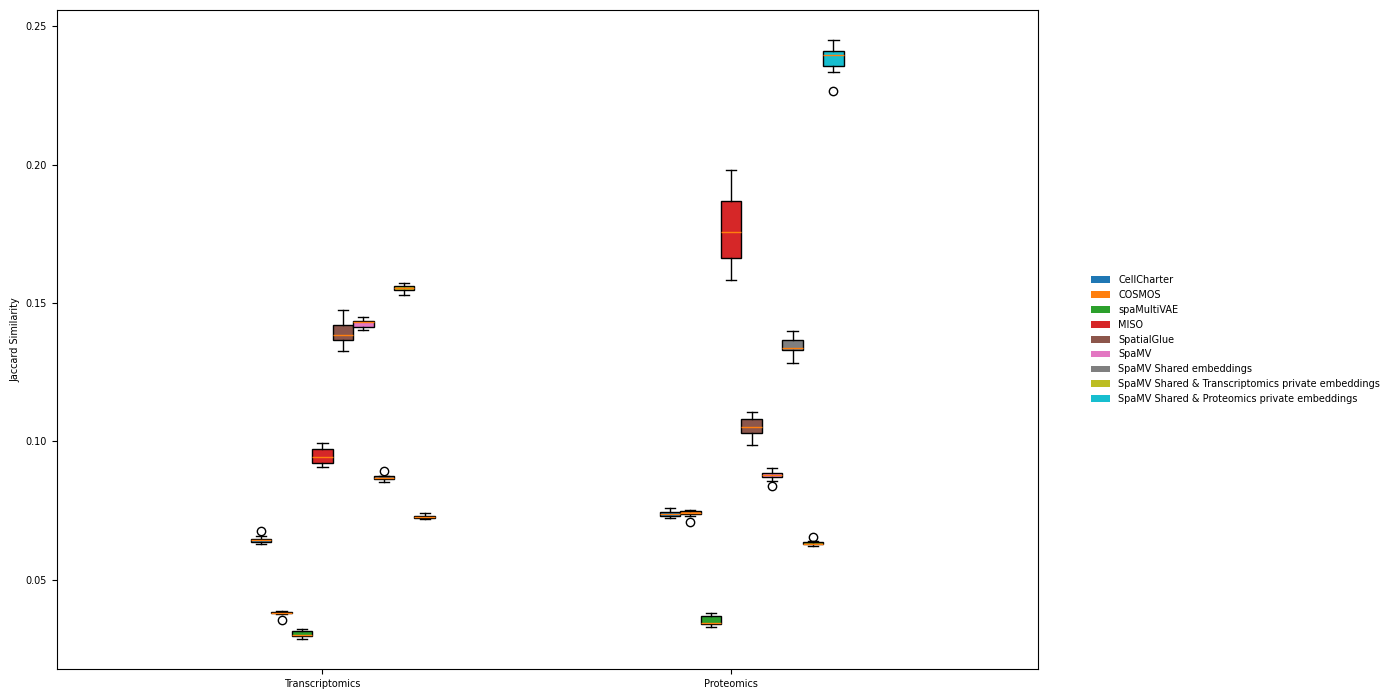

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


metrics = melted_df["metric"].unique()
methods = melted_df["method"].unique()
n_metrics = len(metrics)
n_methods = len(methods)

# Calculate positions for each boxplot group
positions = []
data = []
for metric_idx, metric in enumerate(metrics):
    for method_idx, method in enumerate(methods):
        # Filter data for this metric and method
        subset = melted_df[(melted_df["metric"] == metric) & (melted_df["method"] == method) & (melted_df["Dataset"] == '4_Human_Lymph_Node')]
        data.append(subset["score"].values)
        # Position calculation (adjust offset for spacing)
        offset = (method_idx - n_methods/2) * 0.05 + 0.075
        positions.append(metric_idx + offset)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
boxplots = ax.boxplot(data, positions=positions, widths=0.05, patch_artist=True)

# Assign colors to methods
colors = plt.cm.tab10(np.linspace(0, 1, n_methods))
for i, box in enumerate(boxplots["boxes"]):
    box.set_facecolor(colors[i % n_methods])  # Cycle colors for each method

# Configure axes and labels
ax.set_xticks(np.arange(n_metrics))
ax.set_xticklabels(metrics)
ax.set_ylabel("Jaccard Similarity")

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=method) for i, method in enumerate(methods)]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, frameon=False)

plt.tight_layout()
plt.show()
